In [1]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
print('train images     :', mnist.train.images.shape,
      'labels:'           , mnist.train.labels.shape)
print('validation images:', mnist.validation.images.shape,
      ' labels:'          , mnist.validation.labels.shape)
print('test images      :', mnist.test.images.shape,
      'labels:'           , mnist.test.labels.shape)

train images     : (55000, 784) labels: (55000, 10)
validation images: (5000, 784)  labels: (5000, 10)
test images      : (10000, 784) labels: (10000, 10)


In [3]:
def layer(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [4]:
x = tf.placeholder("float", [None, 784])

In [5]:
h1=layer(output_dim=256,input_dim=784,
         inputs=x ,activation=tf.nn.relu)  


In [6]:
y_predict=layer(output_dim=10,input_dim=256,
                    inputs=h1,activation=None)


In [7]:
y_label = tf.placeholder("float", [None, 10])

In [8]:
loss_function = tf.reduce_mean(
                  tf.nn.softmax_cross_entropy_with_logits
                         (logits=y_predict , 
                          labels=y_label))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [9]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001) \
                    .minimize(loss_function)

In [10]:
correct_prediction = tf.equal(tf.argmax(y_label  , 1),
                              tf.argmax(y_predict, 1))

In [11]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [12]:
trainEpochs = 15
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize)
epoch_list=[];loss_list=[];accuracy_list=[]
from time import time
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [13]:
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x,y_label: batch_y})
        
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x: mnist.validation.images, 
                                   y_label: mnist.validation.labels})

    epoch_list.append(epoch);loss_list.append(loss)
    accuracy_list.append(acc)    
    print("Train Epoch:", '%02d' % (epoch+1), "Loss=", \
                "{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)      

Train Epoch: 01 Loss= 6.280318260  Accuracy= 0.844
Train Epoch: 02 Loss= 4.001015663  Accuracy= 0.8898
Train Epoch: 03 Loss= 3.267730951  Accuracy= 0.9006
Train Epoch: 04 Loss= 2.721285105  Accuracy= 0.9158
Train Epoch: 05 Loss= 2.413046837  Accuracy= 0.9186
Train Epoch: 06 Loss= 2.140908957  Accuracy= 0.9234
Train Epoch: 07 Loss= 1.962398887  Accuracy= 0.9262
Train Epoch: 08 Loss= 1.766136289  Accuracy= 0.9316
Train Epoch: 09 Loss= 1.677048802  Accuracy= 0.9352
Train Epoch: 10 Loss= 1.594104648  Accuracy= 0.9366
Train Epoch: 11 Loss= 1.553930163  Accuracy= 0.937
Train Epoch: 12 Loss= 1.462784529  Accuracy= 0.9392
Train Epoch: 13 Loss= 1.411123633  Accuracy= 0.9406
Train Epoch: 14 Loss= 1.351722956  Accuracy= 0.9414
Train Epoch: 15 Loss= 1.329681993  Accuracy= 0.945
Train Finished takes: 11.372538566589355


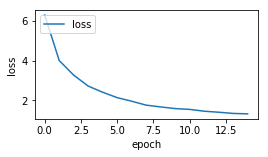

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

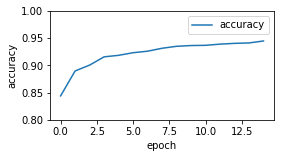

In [15]:
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [16]:
print("Accuracy:", sess.run(accuracy,
                           feed_dict={x: mnist.test.images,
                                      y_label: mnist.test.labels}))

Accuracy: 0.9458


In [17]:
prediction_result=sess.run(tf.argmax(y_predict,1),
                           feed_dict={x: mnist.test.images })

In [18]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 4], dtype=int64)

In [19]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        
        ax.imshow(np.reshape(images[idx],(28, 28)), 
                  cmap='binary')
            
        title= "label=" +str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

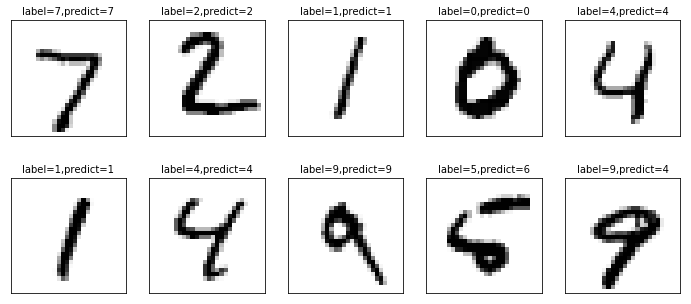

In [20]:
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels,
                              prediction_result,0)

In [21]:
y_predict_Onehot=sess.run(y_predict,
                          feed_dict={x: mnist.test.images })

In [22]:
y_predict_Onehot[8]

array([ -9.883684, -77.07124 ,  14.698351, -14.342152,  25.343586,
        41.24371 ,  80.13854 , -84.839905,  20.148836,  17.394493],
      dtype=float32)

In [23]:
for i in range(400):
    if prediction_result[i]!=np.argmax(mnist.test.labels[i]):
        print("i="+str(i)+
              "   label=",np.argmax(mnist.test.labels[i]),
              "predict=",prediction_result[i])

i=8   label= 5 predict= 6
i=9   label= 9 predict= 4
i=61   label= 8 predict= 2
i=62   label= 9 predict= 5
i=84   label= 8 predict= 5
i=92   label= 9 predict= 4
i=124   label= 7 predict= 4
i=149   label= 2 predict= 9
i=206   label= 9 predict= 8
i=245   label= 3 predict= 5
i=247   label= 4 predict= 2
i=257   label= 8 predict= 1
i=259   label= 6 predict= 0
i=266   label= 8 predict= 0
i=303   label= 2 predict= 8
i=307   label= 7 predict= 1
i=318   label= 2 predict= 0
i=320   label= 9 predict= 7
i=321   label= 2 predict= 7
i=324   label= 0 predict= 4
i=340   label= 5 predict= 3
i=344   label= 8 predict= 2
